In [15]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
# reading dataset

data_train = pd.read_csv(r'C:\Users\Darab Store\Desktop\ML-projects\Git-Hub\Tutorials\visualization\boxplot\train.csv')
data_train.drop('id', axis=1, inplace=True)
data_train

,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,Maximum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,584,590,909972,909977,16,8,5,2274,113,140,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,808,816,728350,728372,433,20,54,44478,70,111,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,39,192,2212076,2212144,11388,705,420,1311391,29,141,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,781,789,3353146,3353173,210,16,29,3202,114,134,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,1540,1560,618457,618502,521,72,67,48231,82,111,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,749,757,143210,143219,17,4,4,2193,122,140,...,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0
19215,723,735,2488529,2488541,231,17,26,27135,104,133,...,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1
19216,6,31,1578055,1578129,780,114,98,71112,41,94,...,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0
19217,9,18,1713172,1713184,126,13,26,14808,88,132,...,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1


In [34]:
def get_fault(row):
    fault_columns = ['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults']
    for column in fault_columns:
        if row[column] == 1:
            return column
    return None

data_train['target'] = data_train.apply(get_fault, axis=1)


data_train.drop(['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains', 'Dirtiness', 'Bumps', 'Other_Faults'], axis=1, inplace=True)

data_train = data_train.dropna(subset=['target'])

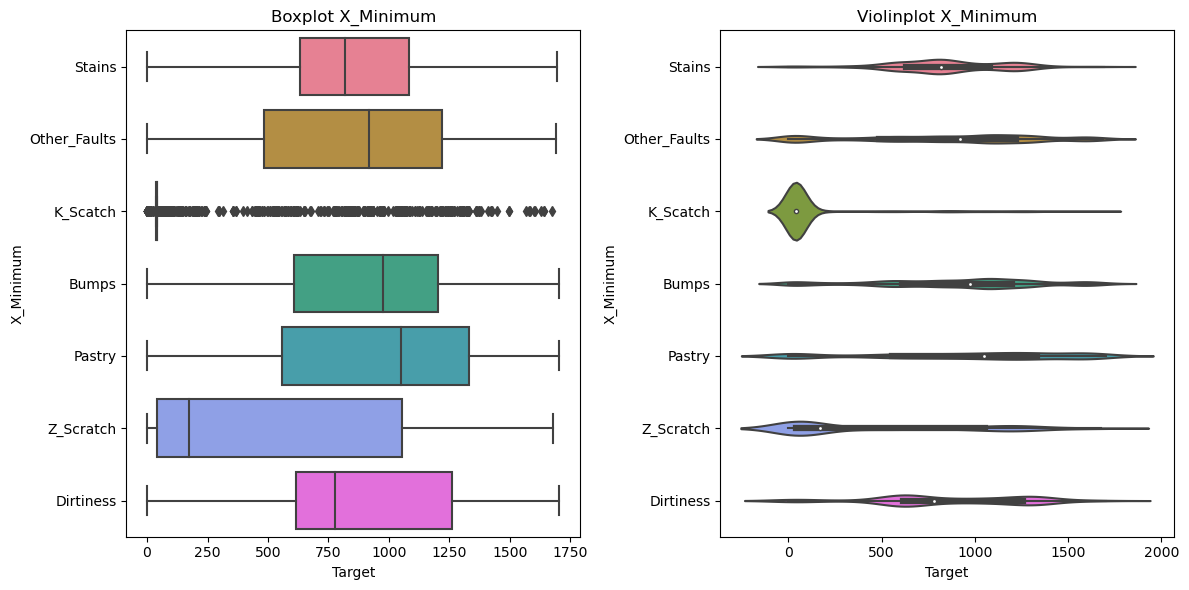

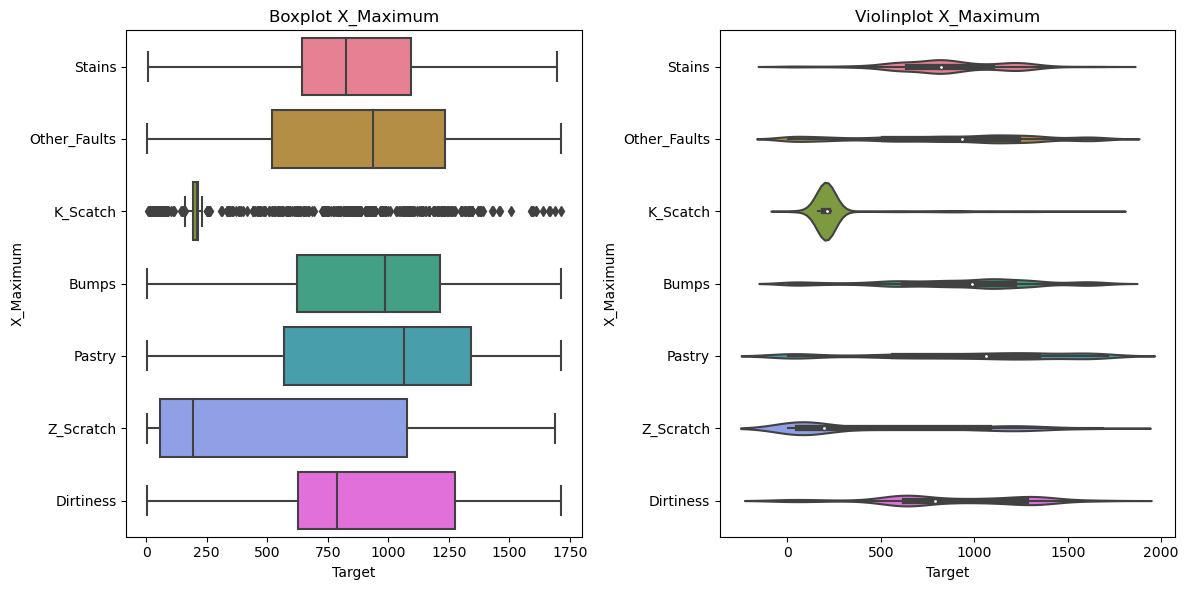

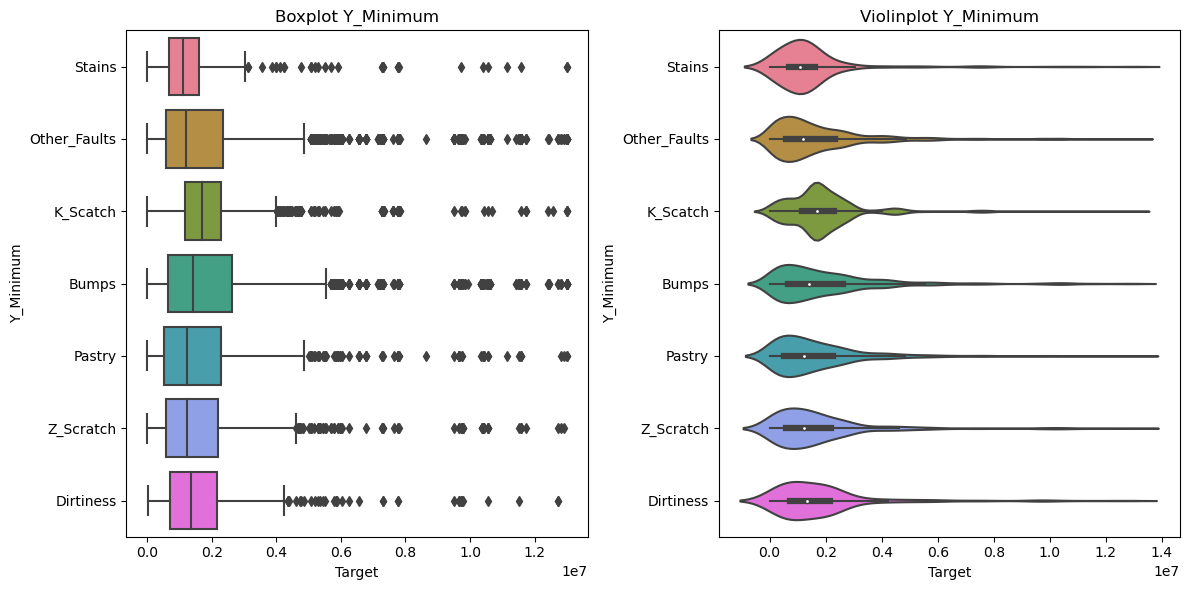

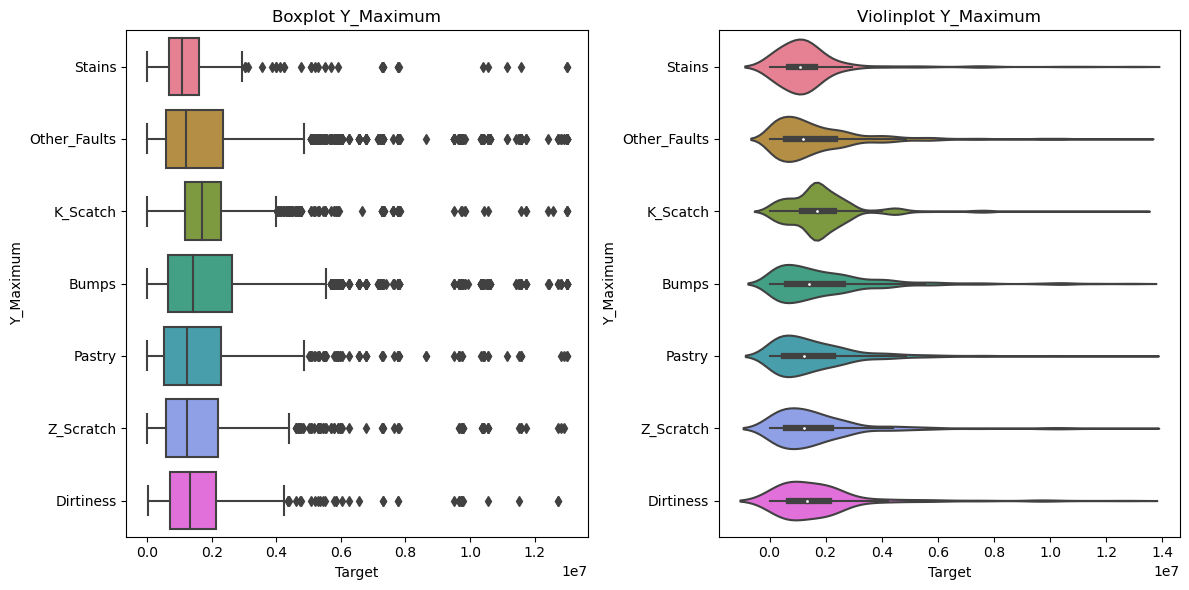

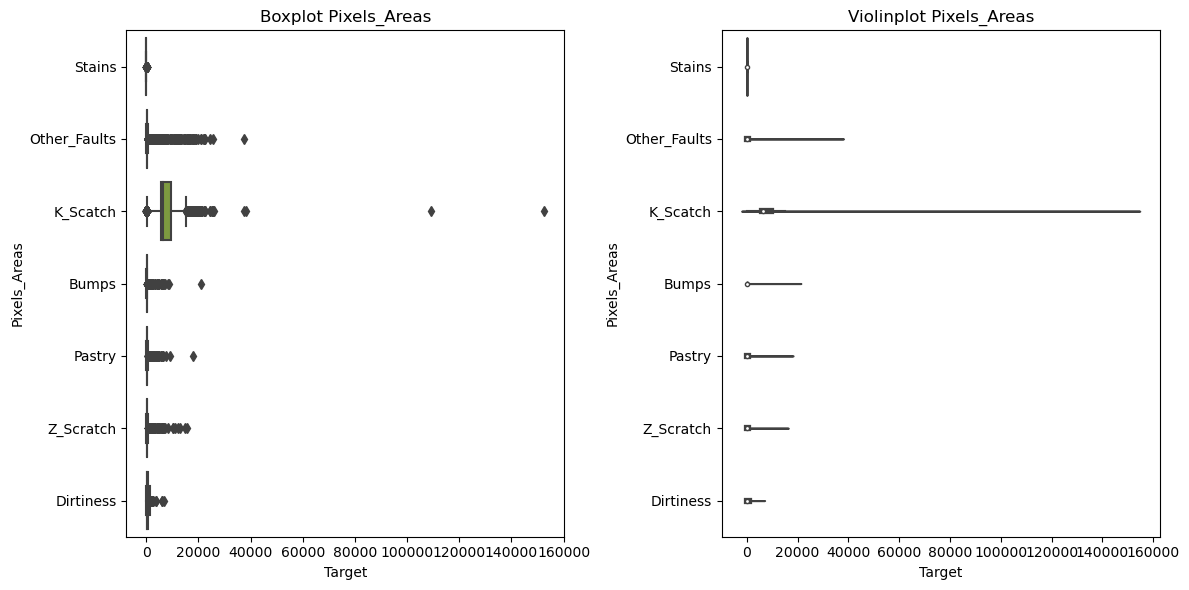

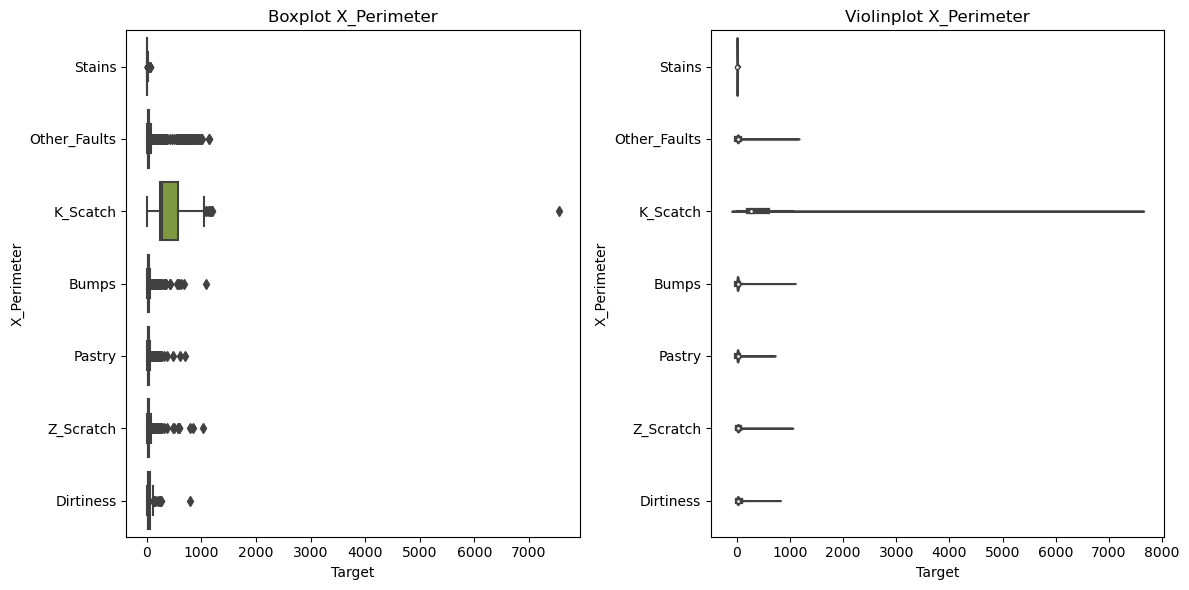

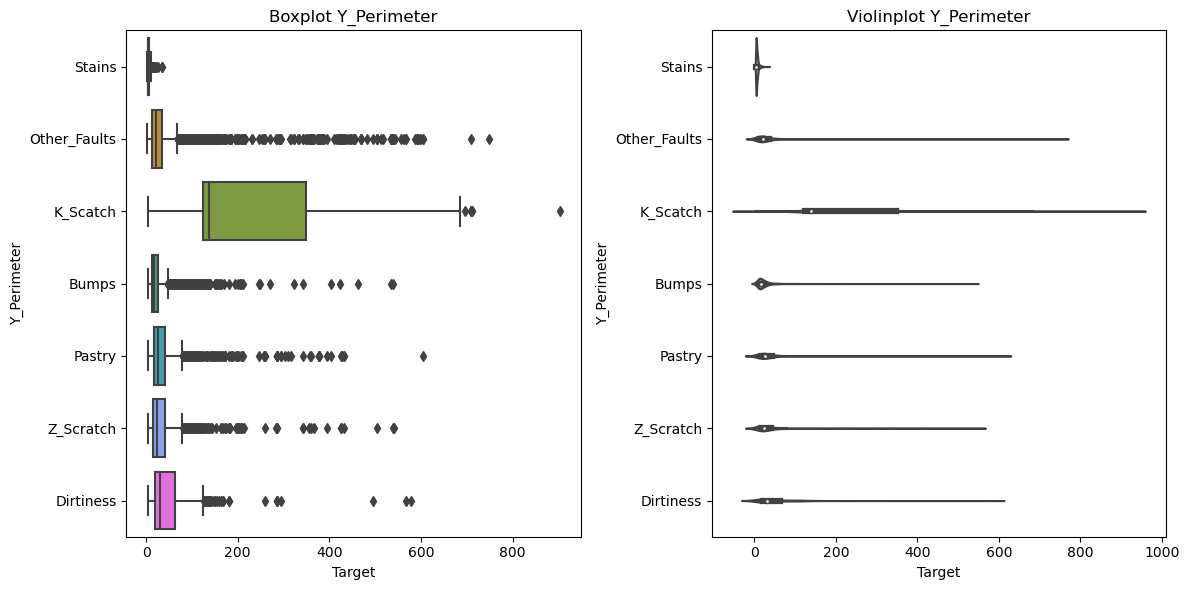

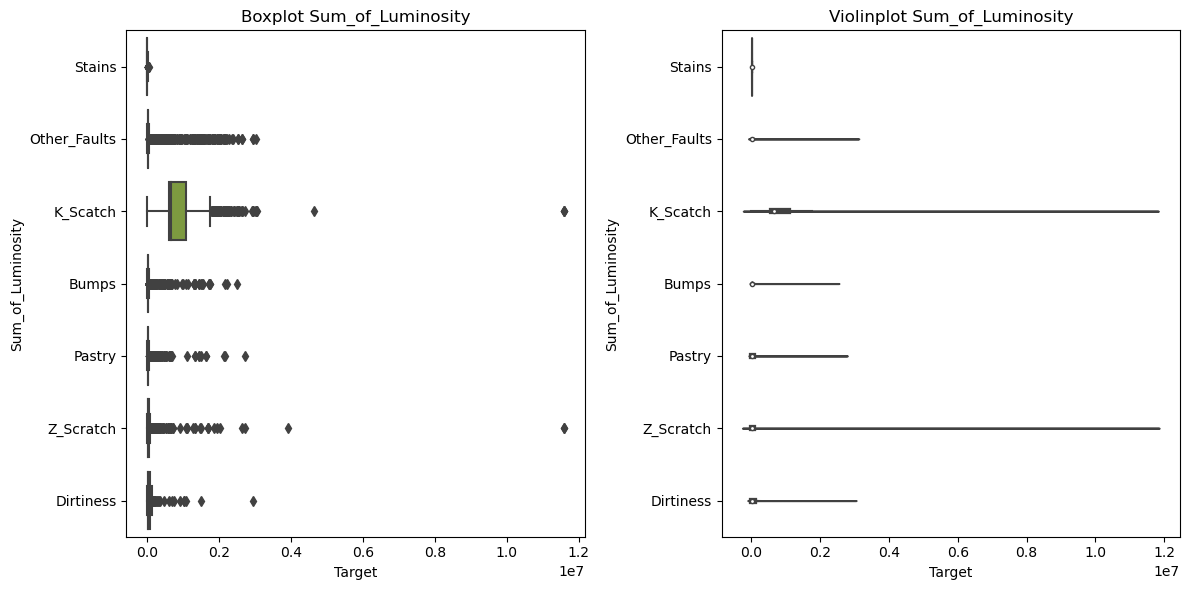

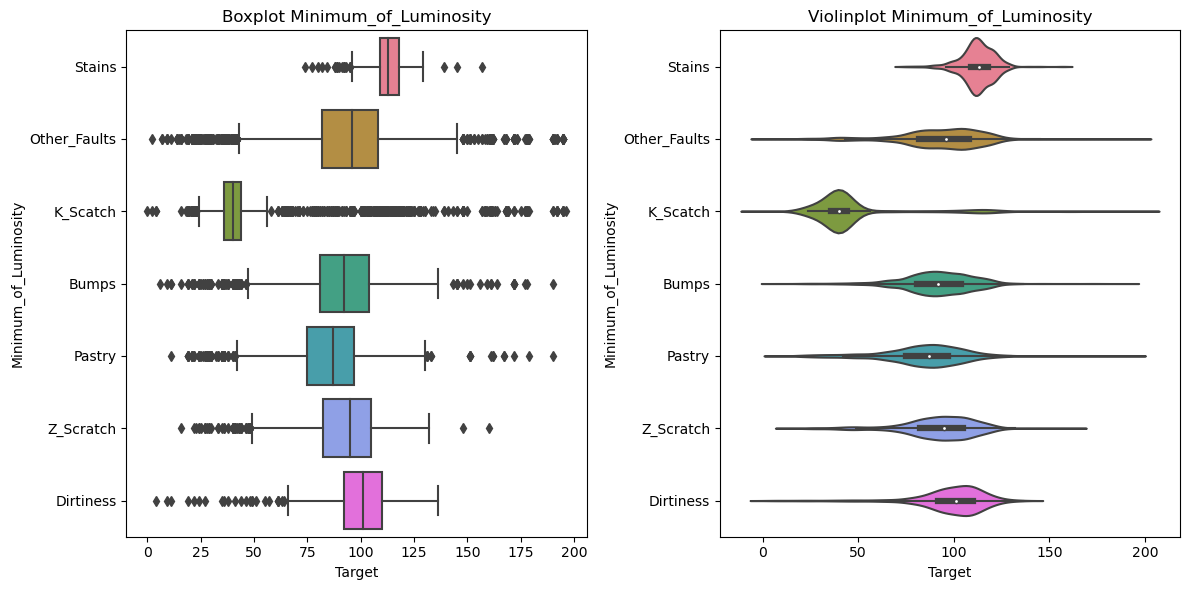

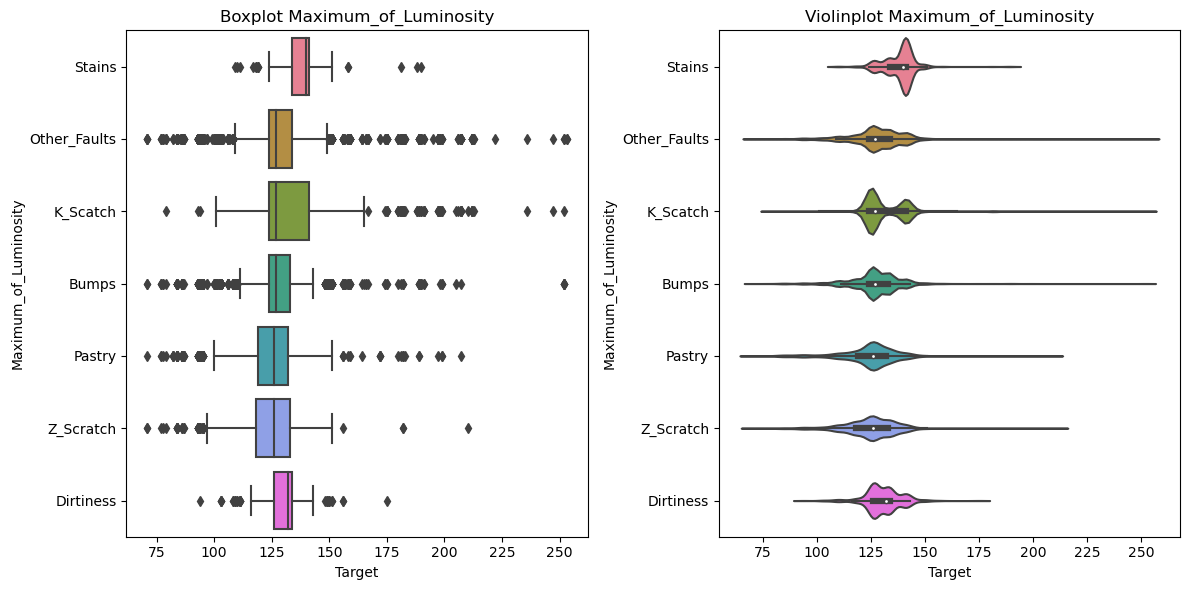

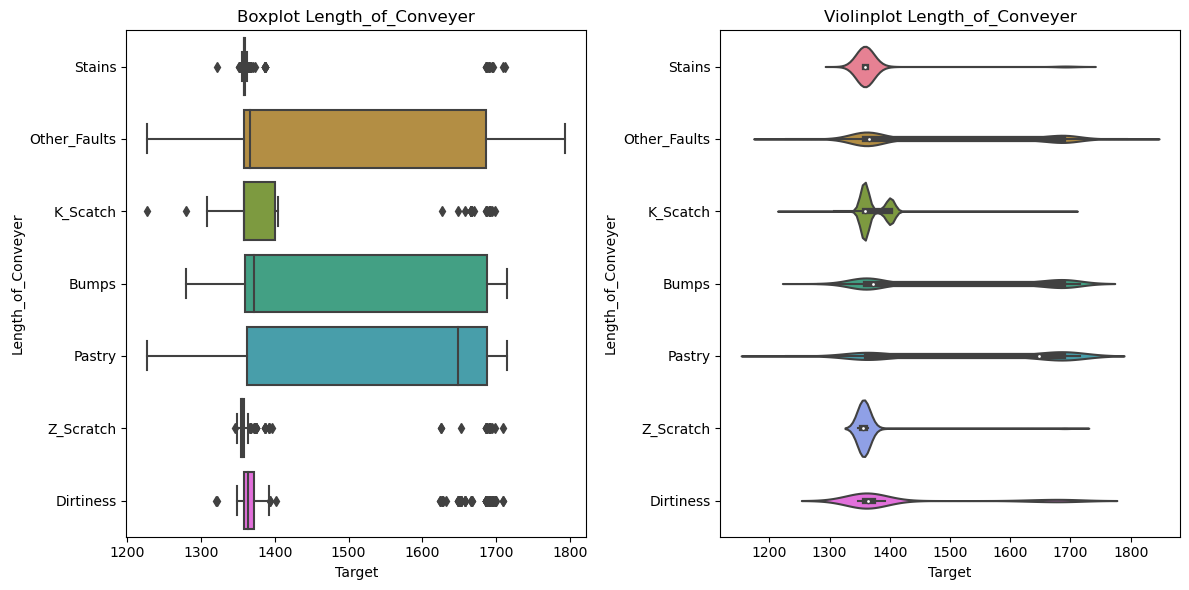

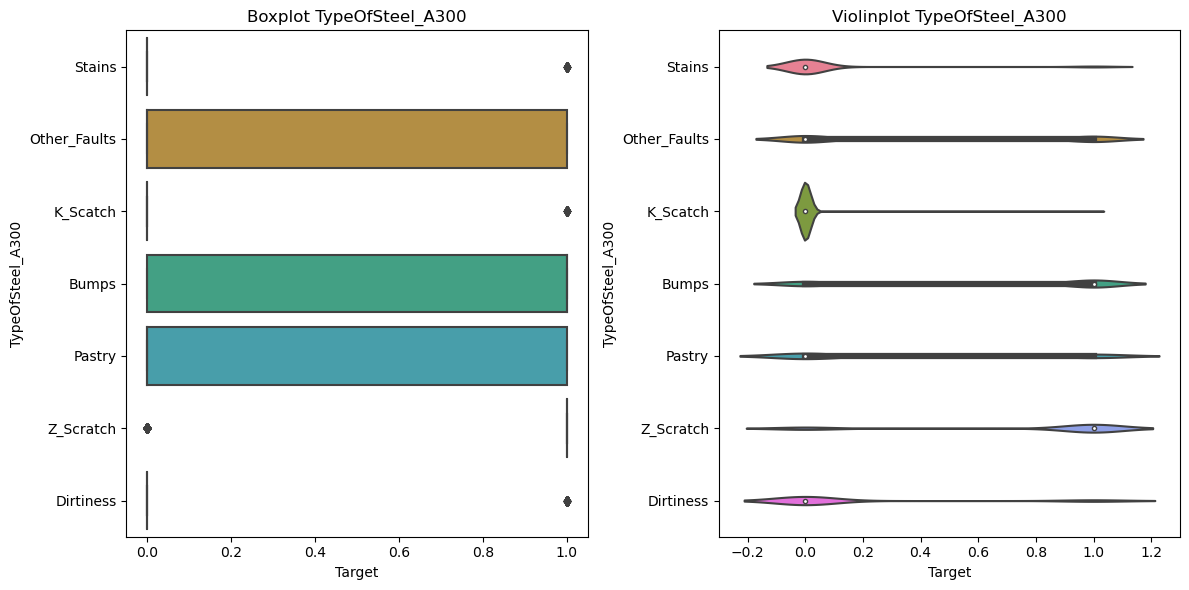

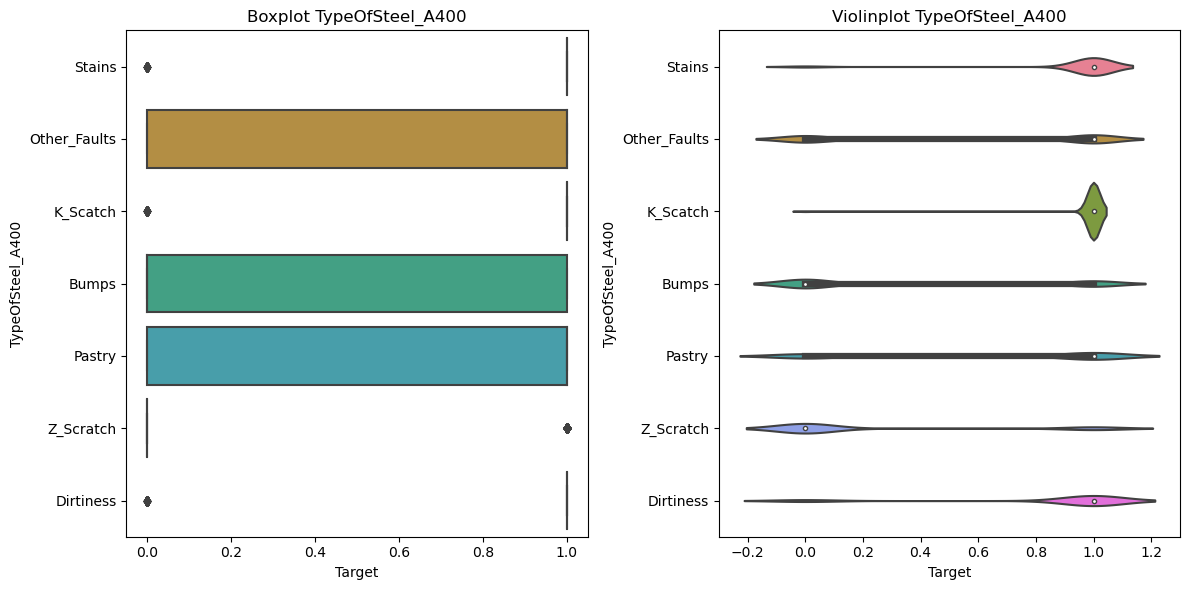

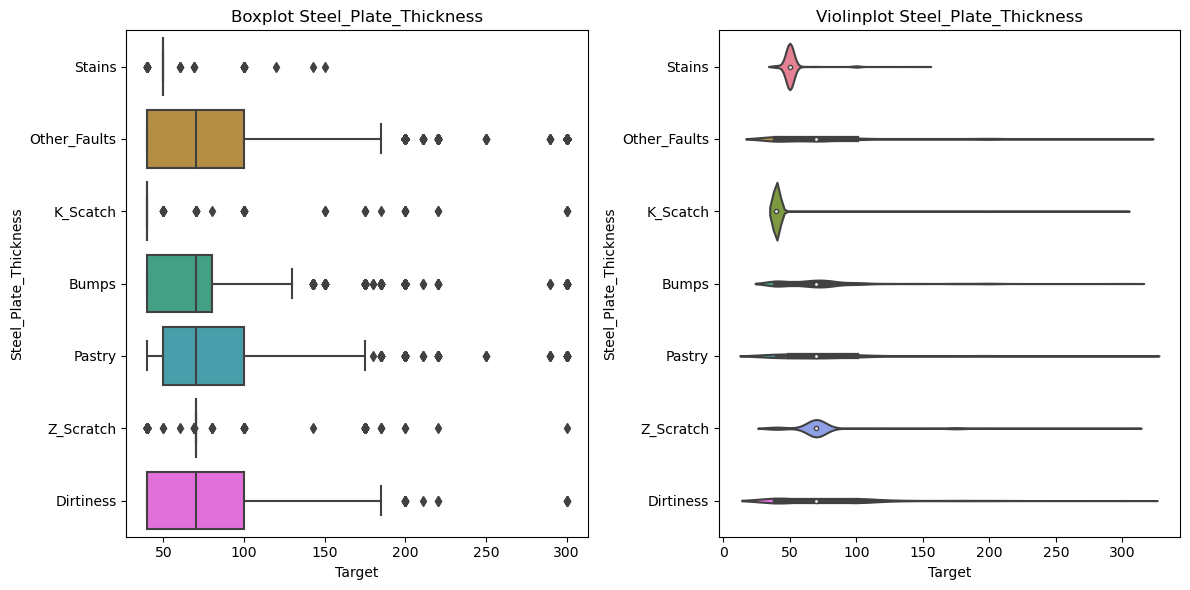

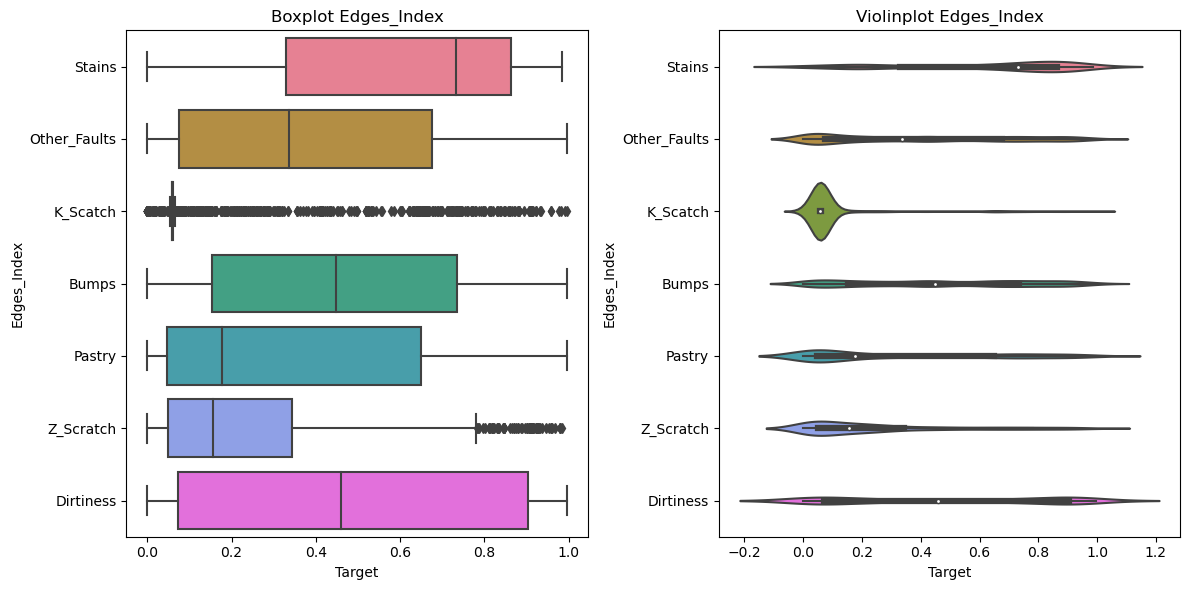

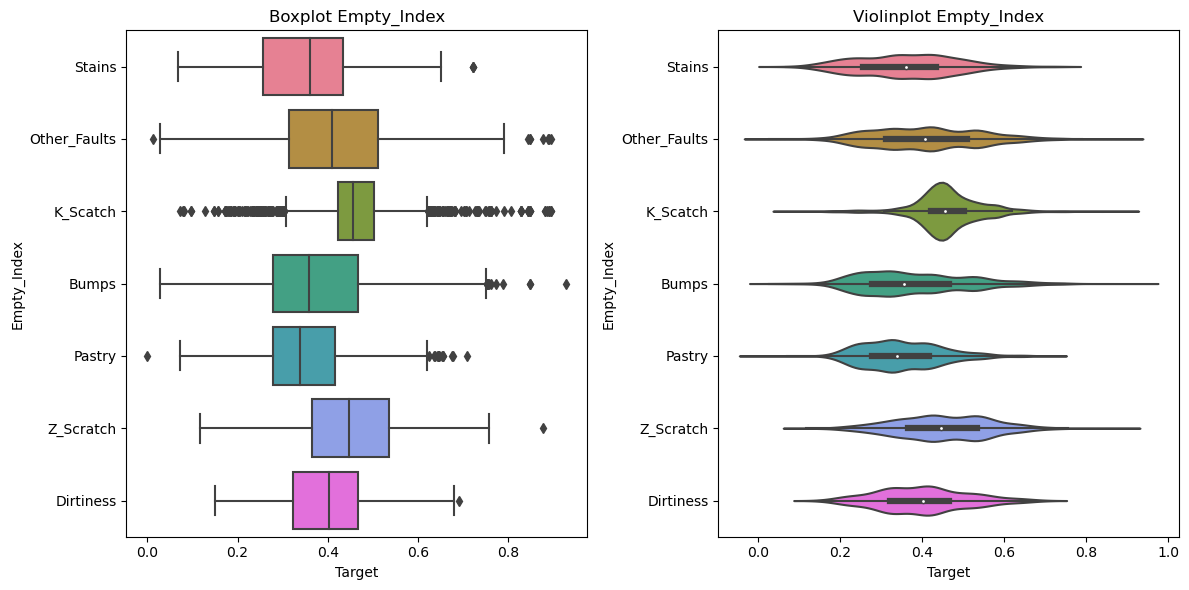

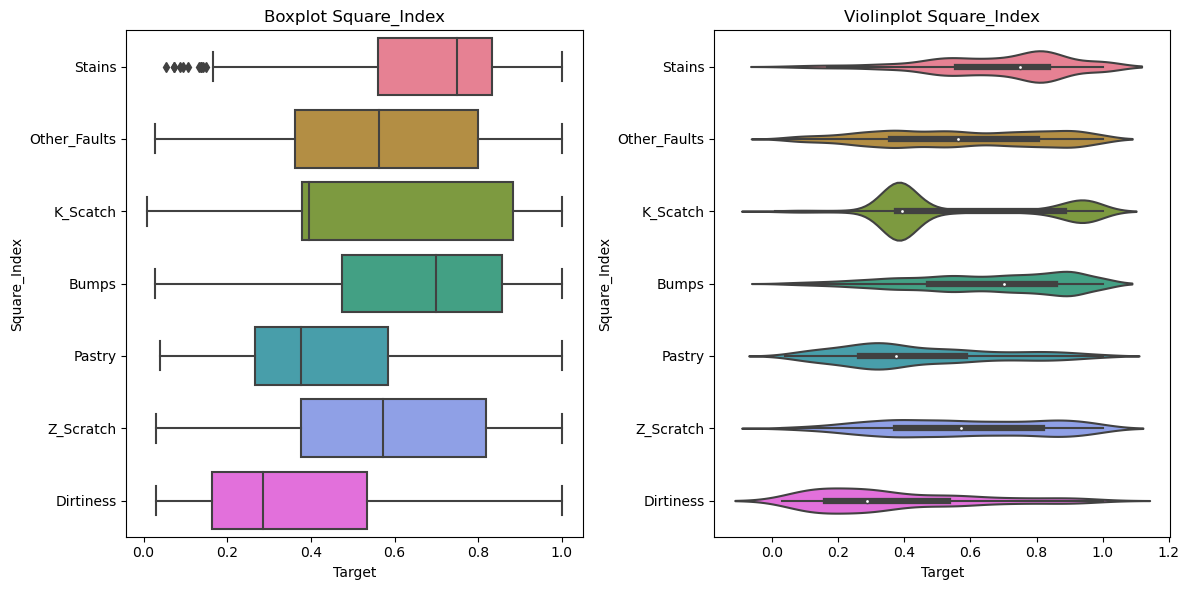

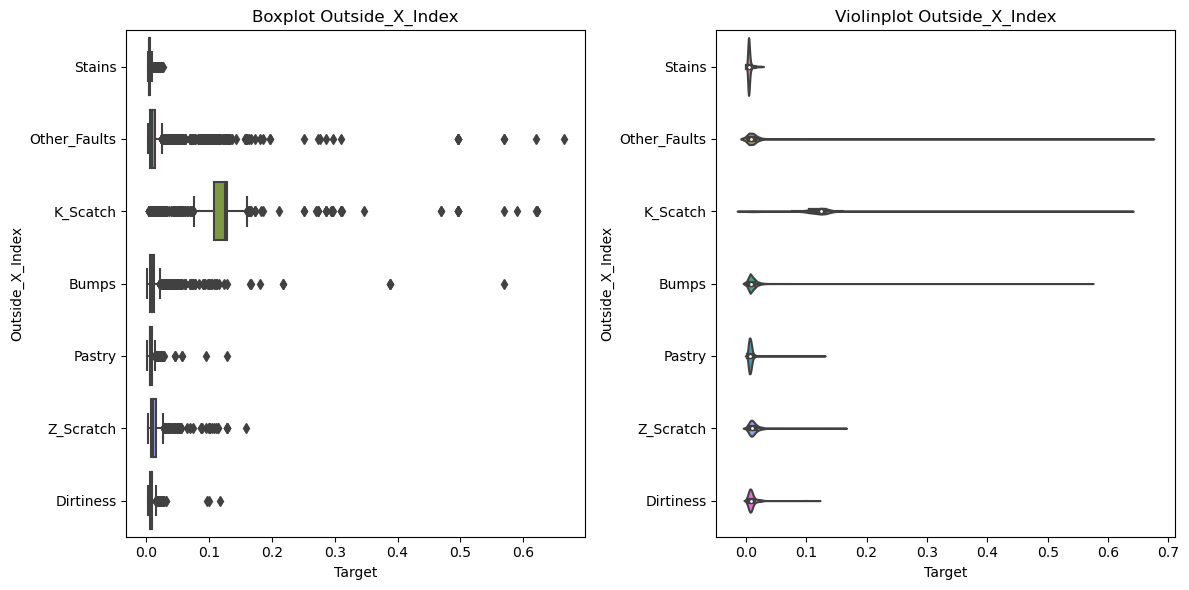

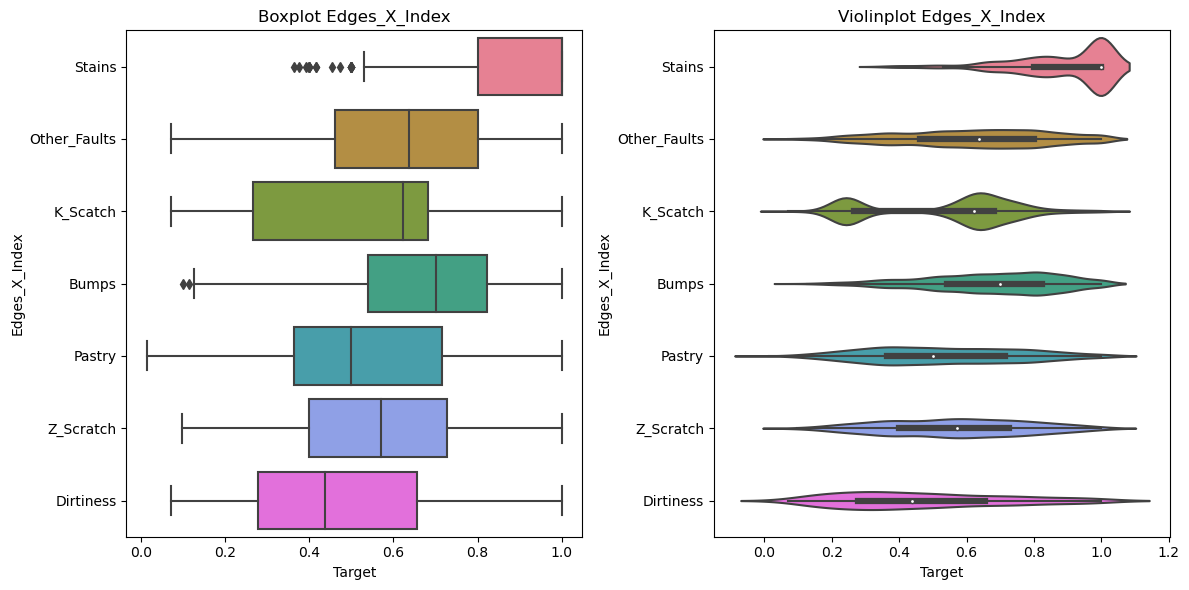

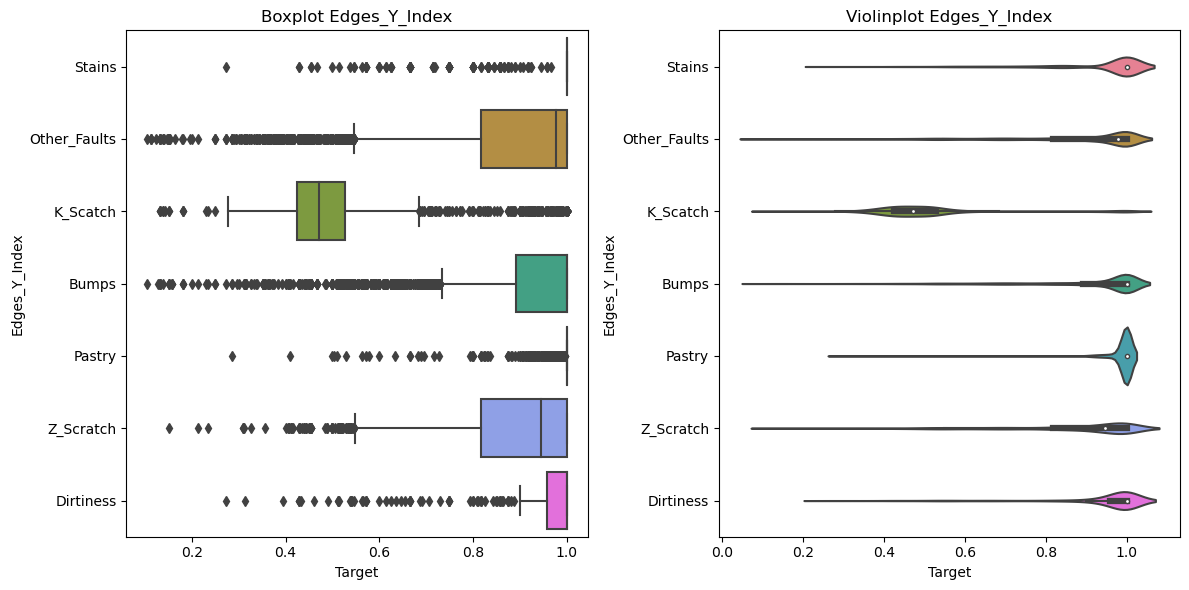

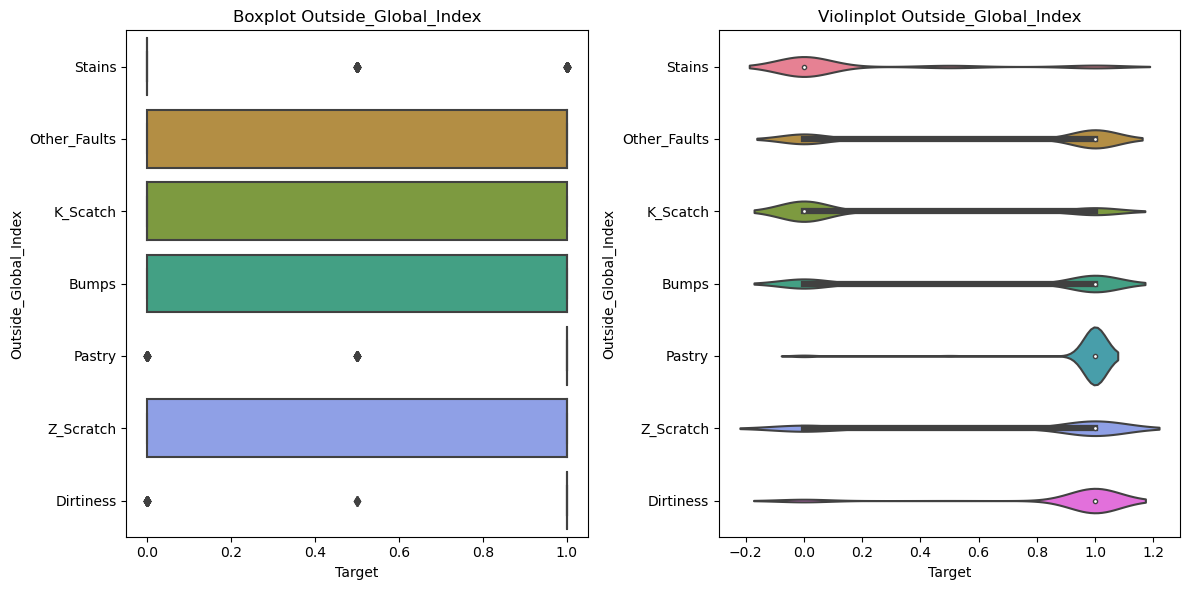

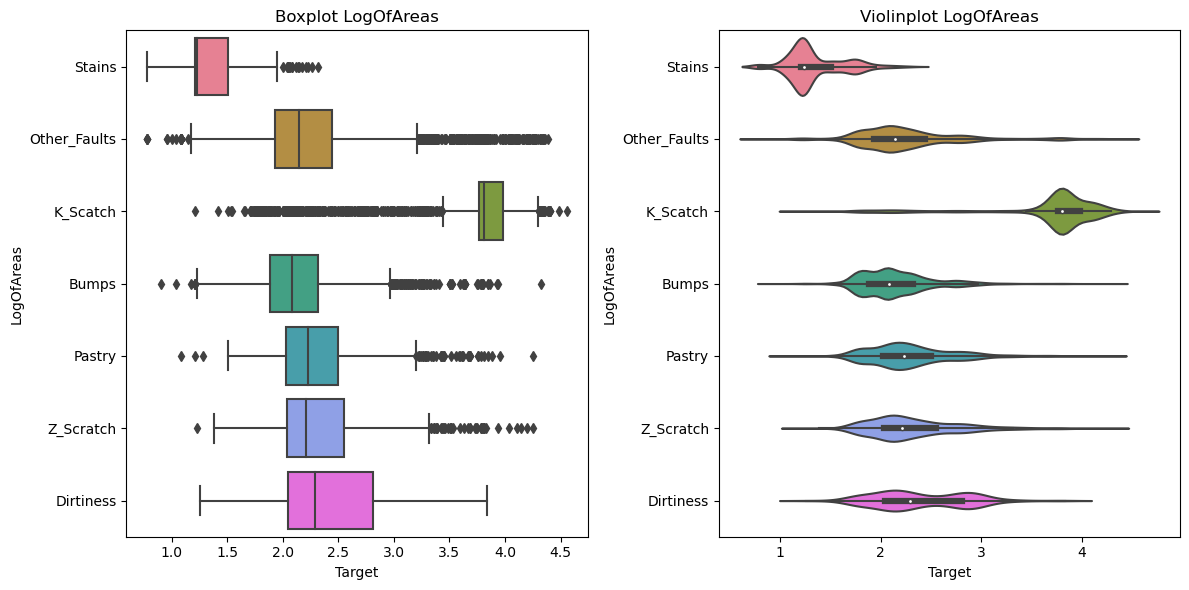

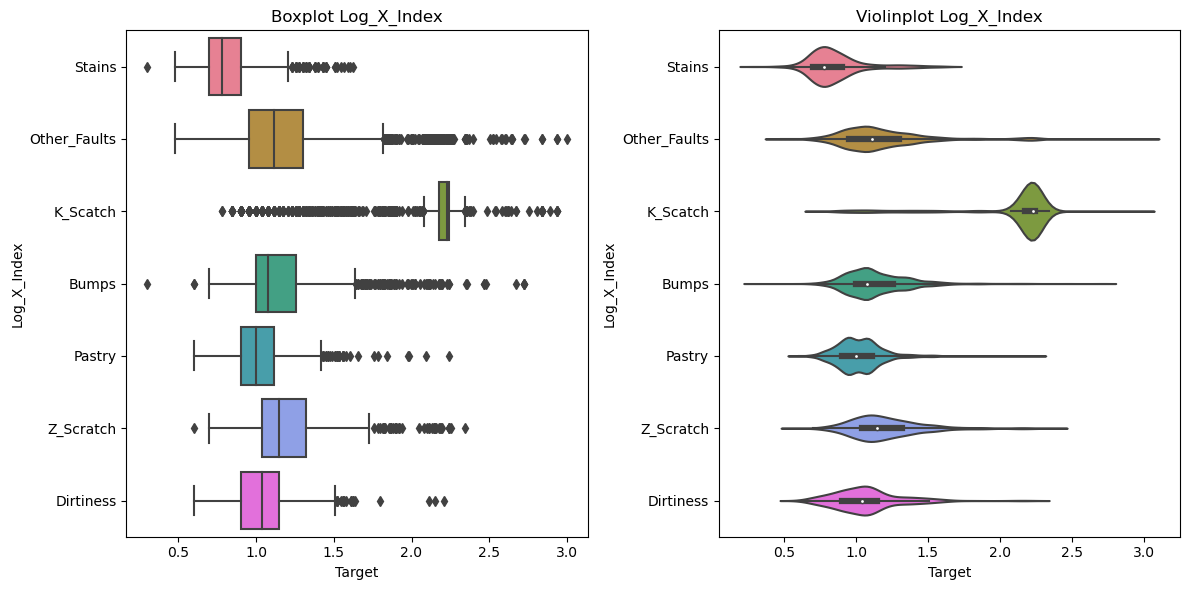

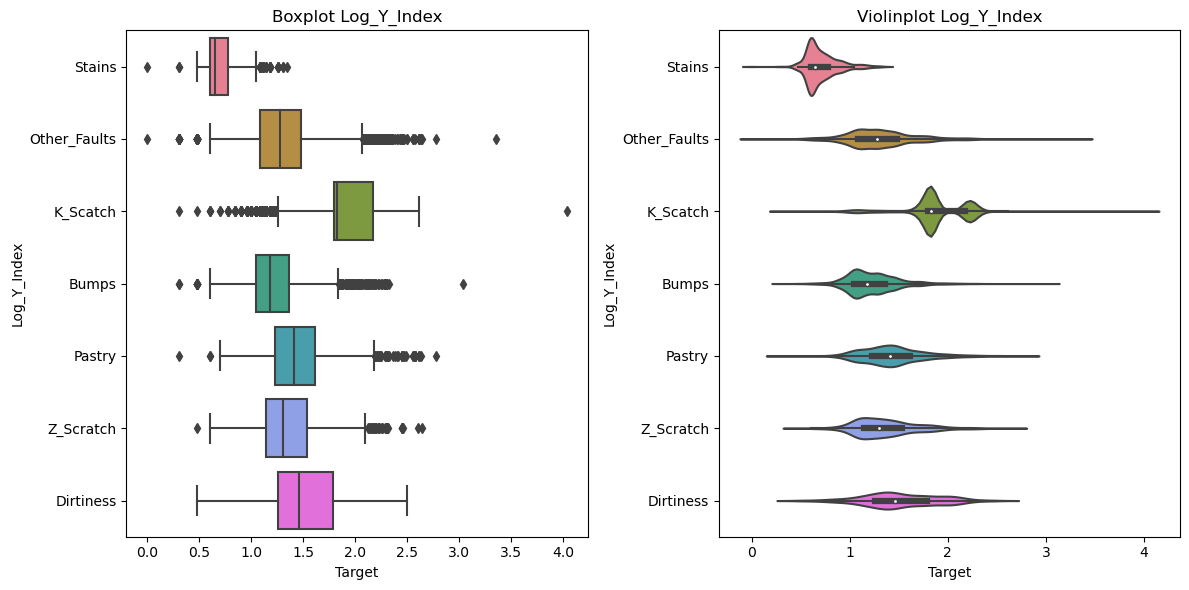

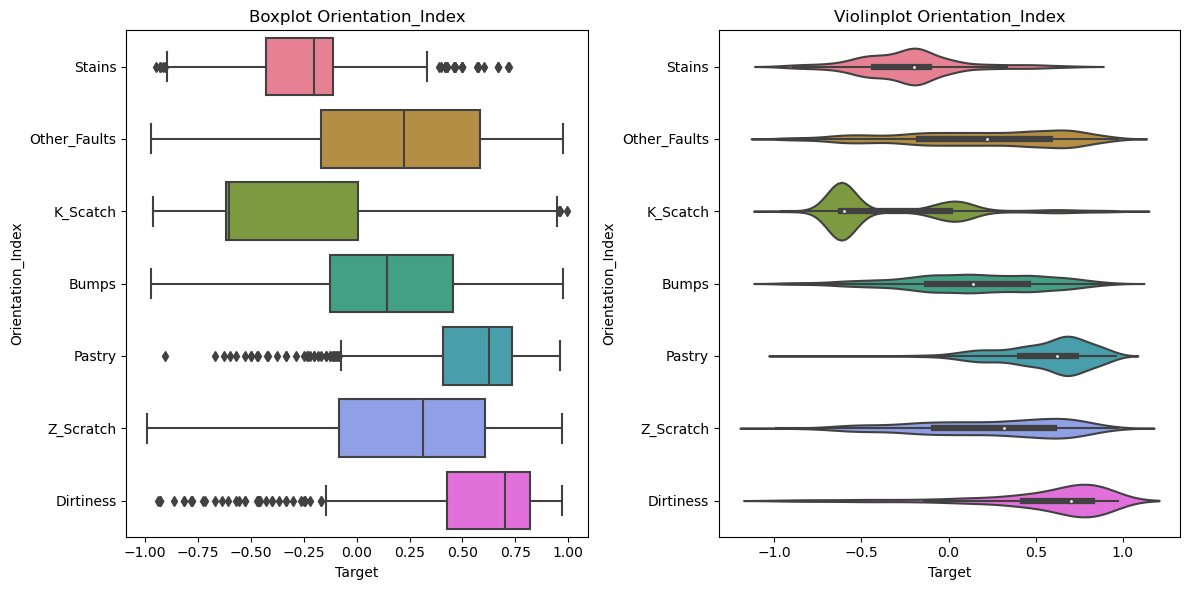

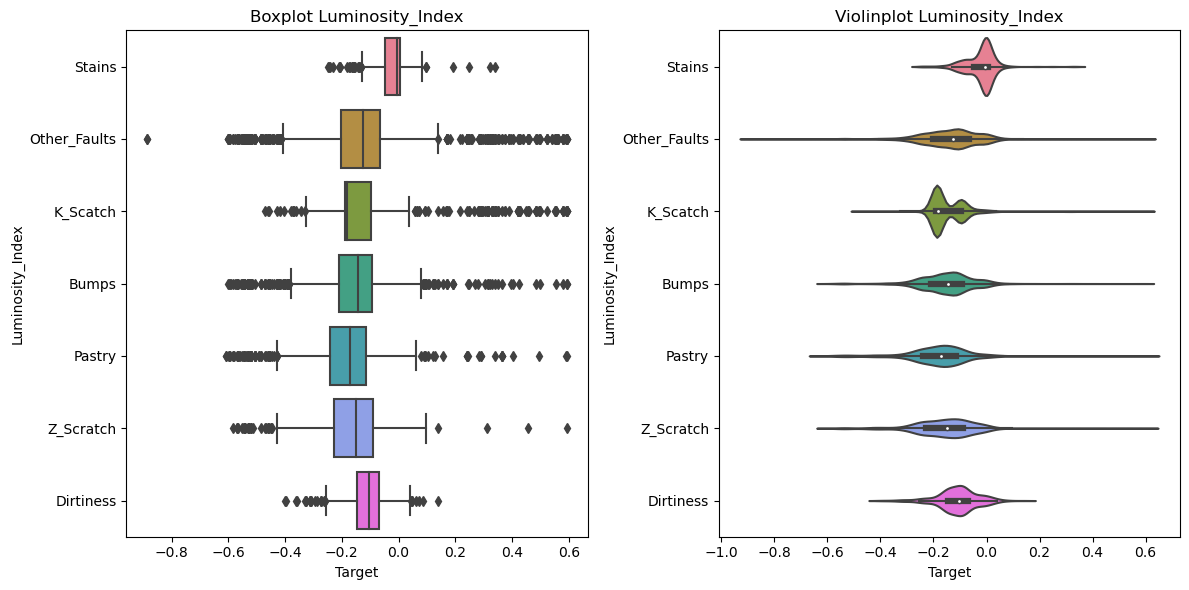

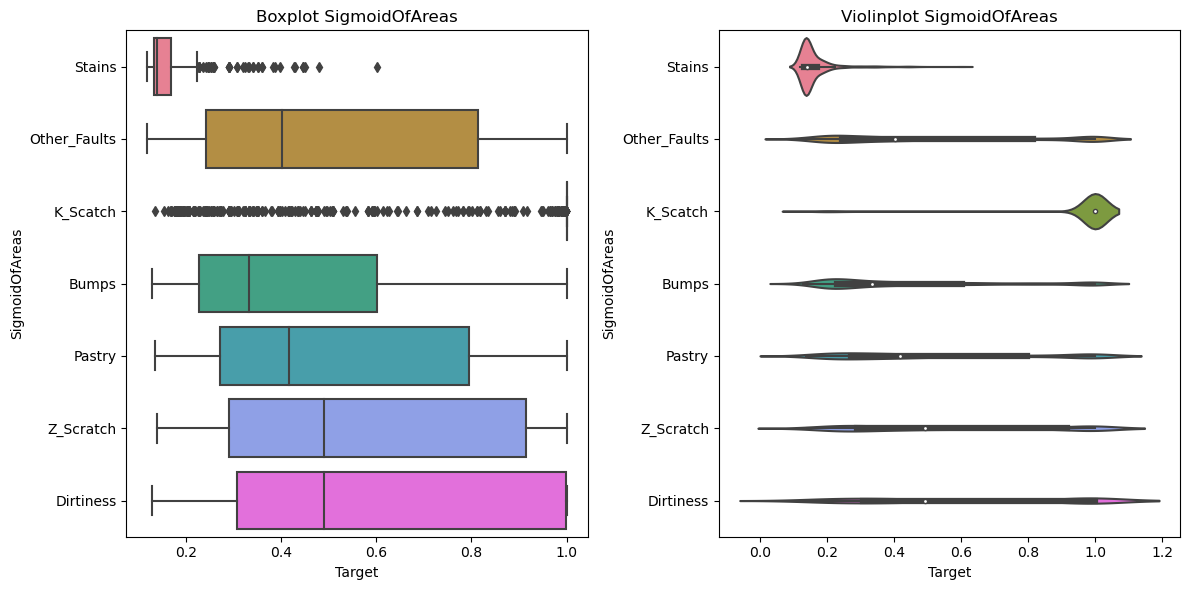

In [36]:
columns = [col for col in data_train.columns if col not in ['id', 'target']]

for col in columns:
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Boxplot
    sns.boxplot(x=col, y='target', data=data_train, palette='husl', ax=axs[0])
    axs[0].set_title(f'Boxplot {col}')
    axs[0].set_xlabel('Target')
    axs[0].set_ylabel(col)

    # Violinplot
    sns.violinplot(x=col, y='target', data=data_train, palette='husl', ax=axs[1])
    axs[1].set_title(f'Violinplot {col}')
    axs[1].set_xlabel('Target')
    axs[1].set_ylabel(col)

    plt.tight_layout()
    plt.show()